# Линейные модели и нейронные сети. Практическая работа

В этой практической работе пять обязательных задач.

Они помогут понять, что вы действительно усвоили материал модуля. 

Удачи!

## Цели практической работы
Потренироваться в обучении модели:
- линейной регрессии;
- логистической регрессии; 
- многослойного персептрона.

## Что входит в практическую работу

1. Загрузите датасет и ознакомьтесь с ним.
2. Обучите линейную регрессию, включая признаки с нулевым весом и без них. Замерьте качество.
3. Обучите случайный лес. Замерьте качество.
4. Обучите многослойный перцептрон. Замерьте качество.
5. Реализуйте стратегию голосования. Замерьте качество.

## Что оценивается

* Выполнены все задания. В каждом:
 * в коде нет ручных перечислений, все действия автоматизированы;
 * результаты вычислений и применённых операций корректны;
 * ответы на вопросы, где требуется, корректны и обоснованы; 
 * код читабелен: переменным даны осмысленные названия, соблюдены отступы и правила расстановки пробелов. Стилизация кода соответствует рекомендациям [PEP 8](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).
 
* Репозиторий проекта оформлен корректно:
 * содержит осмысленные коммиты, содержащие конкретные реализованные фичи;
 * ветки названы согласно назначению;
 * файлы, не связанные с проектом, не хранятся в репозитории.

## Как отправить работу на проверку

Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему куратору.

## Задача

Постройте модель классификации, определяющую категорию цены / цену подержанного автомобиля в зависимости от характеристик транспортного средства. 

Используйте датасет из коллекции подержанных автомобилей, выставленных на продажу в Соединенных Штатах. Он уже подготовлен, без выбросов и с категориальными фичами, преобразованными с помощью one hot encoding, и количественными фичами, стандартизированными с помощью скейлеров.

### Описание датасета:
- `id`— идентификатор записи;
- `is_manufacturer_name`— признак производителя автомобиля;

- `region_*`— регион;
- `x0_*`— тип топлива;
- `manufacturer_*`— производитель;
- `short_model_*`— сокращённая модель автомобиля;
- `title_status_*`— статус;
- `transmission_*`— коробка передач;
- `state_*`— штат;
- `age_category_*`— возрастная категория автомобиля;

- `std_scaled_odometer`— количество пройденных миль (после стандартизации);
- `year_std`— год выпуска (после стандартизации);
- `lat_std`— широта (после стандартизации);
- `long_std`— долгота (после стандартизации);
- `odometer/price_std`— отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`— количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`— количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`— длина наименования автомобиля (после стандартизации);
- `model_word_count_std`— количество слов в наименовании автомобиля (после стандартизации);
- `month_std`— номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`— день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`— количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);
- `price`— стоимость;
- `price_category`— категория цены.

## Обязательные задачи

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import statistics
import random

In [2]:
df = pd.read_csv('data/vehicles_dataset_prepared.csv')
df.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,x0_diesel,x0_electric,x0_gas,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,1.0,0.0,0.0,...,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.322394
1,7316380095,16942,medium,0,1,0,0,0.0,0.0,0.0,...,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.695973
2,7313733749,35590,high,0,0,0,0,0.0,0.0,1.0,...,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.852578
3,7308210929,14500,medium,0,0,0,1,0.0,0.0,1.0,...,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.226157
4,7303797340,14590,medium,0,0,0,0,0.0,0.0,0.0,...,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.069552


**Задача 1. Линейная регрессия**

Вспомните задачу по предсказанию стоимости подержанного автомобиля. Попробуйте обучить модель линейной регрессии для предсказания цены автомобиля (колонка `price`). Для этого сделайте шаги:

- подготовьте данные: удалите колонки, которые косвенно содержат информацию о целевой переменной (`odometer/price_std`, `price_category`);
- разделите выборку на треин и тест в отношении 70/30;
- обучите модель линейной регрессии с дефолтными параметрами;
- посчитайте значение метрики mae на тестовой выборке для линейной регрессии;
- выведите получившиеся коэффициенты линейной регрессии при каждом параметре обучающей выборки с помощью метода `coef_` (есть ли коэффициенты, которые равны нулю? Если есть, выведите названия фичей с нулевым коэффициентом);
- удалите фичи, коэффициенты которых равны нулю; переобучите модель; убедитесь, что значение метрики не изменилось.



In [3]:
df_new = df.drop(['odometer/price_std', 'price_category'], axis=1)

x = df_new.drop(['price'], axis=1) 
y = df_new.price

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

LinearRegression()

In [5]:
predicted_lin = lin_reg.predict(test_x)
mean_absolute_error(test_y, predicted_lin)

4600.341121728319

In [6]:
zero_count = np.count_nonzero(lin_reg.coef_ == 0)

print("Количество нулей в массиве lin_reg.coef_: ", zero_count)

zero_coef_features = [feature_name for feature_name, coef in zip(x, lin_reg.coef_) if coef == 0]

print("Фичи с нулевыми коэффициентами: ", zero_coef_features)

df_new = df_new.drop(['manufacturer_ferrari'], axis=1)


Количество нулей в массиве lin_reg.coef_:  1
Фичи с нулевыми коэффициентами:  ['manufacturer_ferrari']


In [7]:
x = df_new.drop(['price'], axis=1) 
y = df_new.price
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)
predicted_lin = lin_reg.predict(test_x)
mean_absolute_error(test_y, predicted_lin)

4600.34112154878

**Задача 2. Логистическая регрессия**

Теперь в рамках тех же данных попробуйте предсказать `price_category` с помощью алгоритма логистической регрессии. Предварительно из датафрейма удалите переменные, в которых косвенно содержится информация о целевой переменной (`odometer/price_std`, `price`). 

Для обученной модели:

- рассчитайте и выведите метрику качества (accuracy) на тренировочной выборке;
- сделайте предикт на тестовых данных и положите его в переменную `logreg_pred`;
- рассчитайте и выведите accuracy и confusion_matrix на тестовой выборке.

Обратите внимание, что это задание засчитывается, если: 
- accuracy на тренировочной выборке > 87%;
- accuracy на тестовой выборке > 75.5%.

Для улучшения метрики можно преобразовывать входные данные и тюнить параметры логистической регрессии.

In [8]:
# Ваш код подготовки данных здесь. Допишите инициализацию входных фичей и целевую переменную
x = df.drop(['price', "odometer/price_std", 'price_category','manufacturer_ferrari','id'], axis=1) 
y = df.price_category

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:

# Ваш код обучения моделей здесь

log_reg = LogisticRegression(random_state=42, C=3, max_iter=1000, solver='lbfgs')
log_reg.fit(x_train, y_train)
logreg_pred = log_reg.predict(x_test)
logreg_pred_train = log_reg.predict(x_train)

print('Accuracy on train:',accuracy_score(y_train, logreg_pred_train))
print('Accuracy on test:',accuracy_score(y_test, logreg_pred))
print('Matrix on test:\n', confusion_matrix(y_test, logreg_pred))

Accuracy on train: 0.8786573592752116
Accuracy on test: 0.7612612612612613
Matrix on test:
 [[804  23 170]
 [ 24 770 159]
 [149 164 623]]


In [10]:



# a = log_reg.coef_
# coef_list = list(zip(x_train.columns, a))
# b = pd.DataFrame(coef_list, columns=['Feature', 'Coefficient'])

# # Предположим, что коэффициенты хранятся в переменной a
# feature_names = x_train.columns  # Замените на реальные названия признаков

# plt.figure(figsize=(10, 6))
# plt.bar(feature_names, a[0])  # Предполагая, что a содержит коэффициенты для одного класса в задаче многоклассовой классификации

# plt.title('Коэффициенты логистической регрессии')
# plt.xlabel('Признаки')
# plt.ylabel('Значение коэффициента')
# plt.xticks(rotation=45)
# plt.show()

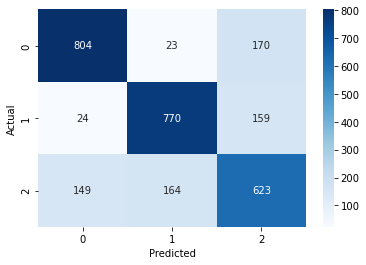

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Создание confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_pred)

# Построение confusion matrix с помощью seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:


# Определение сетки параметров для кросс-валидации
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Параметр регуляризации
#     'penalty': ['l2'],  # Тип регуляризации
#     'solver': ['lbfgs', 'saga', 'liblinear']  # Алгоритм оптимизации
# }

# # Определение метода кросс-валидации
# cv = 5  # Количество фолдов в кросс-валидации

# # Создание экземпляра GridSearchCV
# grid_search = GridSearchCV(
#     estimator=log_reg,
#     param_grid=param_grid,
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1,
#     cv=cv
# )
# Модель для перебора параметров базовой модели
# randomized_search = RandomizedSearchCV(
#    estimator=log_reg,
#    param_distributions=param_grid,
#    n_iter=50,
#    scoring='accuracy',
#    verbose=1,
#    n_jobs=-1
# )


# Обучение модели с использованием кросс-валидации
#############estimator.get_params().keys()

#1 {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
#2 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.001}

In [13]:
#randomized_search.fit(x_train, y_train)  # X - матрица признаков, y - вектор целевых значений

In [14]:
# best_params = randomized_search.best_params_
# best_params

**Задача 3. Многослойный персептрон**

Решите задачу, поставленную в предыдущем задании, применив модель многослойного персептрона. С помощью данного алгоритма добейтесь лучших значений точности на тренировочной и тестовой выборках, чем на логистической регрессии. 

Увеличение точности в данном задании, по сравнению с предыдущим, должно быть больше увеличения 0.01 по метрике accuracy.

In [ ]:
mlp = MLPClassifier(max_iter=500)

mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)
mlp_pred_train = mlp.predict(x_train)


In [27]:
print('Accuracy on train:',accuracy_score(y_train, mlp_pred_train))
print('Accuracy on test:',accuracy_score(y_test, mlp_pred))
print('Matrix on test:\n', confusion_matrix(y_test, mlp_pred))

Accuracy on train: 0.999405911183722
Accuracy on test: 0.7602217602217602
Matrix on test:
 [[811  23 163]
 [ 18 734 201]
 [133 154 649]]


In [17]:
# остановил, очень долго считает, много параметров
# param_grid = {
#     'hidden_layer_sizes': [(50,),(100,),(50,50),(100,50)],  # пример значений для количества нейронов в скрытых слоях
#     'activation': ['logistic', 'tanh', 'relu'],  # пример значений для функций активации
#     'solver': ['adam', 'sgd'],  # пример значений для методов оптимизации
    
# }

# # Создание и обучение многослойного перцептрона с использованием GridSearch
# mlp = MLPClassifier(max_iter=1000)  # задаем максимальное количество итераций
# grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)  # cv=5 означает 5-кратную перекрестную проверку
# grid_search.fit(x_train, y_train)
# Вывод наилучших параметров
# print("Наилучшие параметры:", grid_search.best_params_)

# # Предсказание на тестовом наборе с использованием наилучших параметров
# y_pred = grid_search.predict(x_test)

# # Оценка точности модели с использованием наилучших параметров
# accuracy = accuracy_score(y_test, y_pred)
# print("Точность модели с использованием наилучших параметров:", accuracy)


**Задача 4. Сравнение с древовидными моделями**

Обучите модель случайного леса на тех же данных для предсказания `price_category`. Сравните качество с моделью логистической регрессии и многослойного персептрона. Словами опишите, какая из моделей в каких случаях работает лучше по результатам на тестовой выборке, обоснуйте свой выбор.

In [28]:
rf_clf = RandomForestClassifier(random_state=42, max_features='log2', n_estimators=800, n_jobs=-1)

In [29]:

rf_clf.fit(x_train, y_train)
rf_clf_pred = rf_clf.predict(x_test)
rf_clf_pred_train = rf_clf.predict(x_train)

In [30]:
print('logreg Accuracy on test:',accuracy_score(y_test, logreg_pred))
print('logreg Matrix on test:\n', confusion_matrix(y_test, logreg_pred))


print('MLP Accuracy on test:',accuracy_score(y_test, mlp_pred))
print('MLP Matrix on test:\n', confusion_matrix(y_test, mlp_pred))


print('rf_clf Accuracy on train:',accuracy_score(y_train, rf_clf_pred_train))
print('rf_clf Accuracy on test:',accuracy_score(y_test, rf_clf_pred))
print('rf_clf Matrix on test:\n', confusion_matrix(y_test, rf_clf_pred))

#rf_clf Accuracy on test: 0.7633402633402634 = n_estimators=800 лучше чем 2000 = Accuracy : 0.7616077616077616


logreg Accuracy on test: 0.7612612612612613
logreg Matrix on test:
 [[804  23 170]
 [ 24 770 159]
 [149 164 623]]
MLP Accuracy on test: 0.7602217602217602
MLP Matrix on test:
 [[811  23 163]
 [ 18 734 201]
 [133 154 649]]
rf_clf Accuracy on train: 1.0
rf_clf Accuracy on test: 0.7633402633402634
rf_clf Matrix on test:
 [[807  41 149]
 [ 15 812 126]
 [139 213 584]]


**я выбираю случайный лес, нет смысла в этом случае использовать сложные конструкции**,
когда можно обойтись простыми и быстрыми математически методами , которые проверены и надежны.
НО я уверен что МЛП можно натренировать горазно лучше по метрике `акураси`, но потребуется больше времени вычисления. Ниже приведены описания плюсов и минусов этих подходов

**Логистическая регрессия:**

Преимущества:
Простота интерпретации результатов.
Эффективность при работе с линейно разделимыми данными.
Недостатки:
Не способна моделировать сложные нелинейные взаимосвязи в данных.

**Многослойный персептрон (нейронная сеть):**

Преимущества:
Способность моделировать сложные нелинейные взаимосвязи в данных.
Гибкость в настройке архитектуры сети.
Недостатки:
Требует большого количества данных для обучения.
Может подвержен переобучению при недостаточной регуляризации.(чтобы модель не переобучалась этот параметр alpha
вводит штрафы за слишком большие веса, чем больше значение альфа тем сильнее регуляризация/контроль)

**Случайный лес:**

Преимущества:
Способность обрабатывать большое количество признаков без явного отбора.
Устойчивость к переобучению благодаря ансамблю деревьев.
Недостатки:
Может быть медленным в обучении из-за построения большого количества деревьев.
Может быть сложным в интерпретации из-за большого количества деревьев.

**Задача 5. Стратегия голосования**

Реализуйте стратегию голосования для предсказания целевой переменной.
Голосование в задаче классификации — это когда несколько моделей выдают свои предикты, и финальным выбирается тот предикт, который предсказали большинство моделей.

Для реализации этой стратегии проделайте следующее:

- сохраните предсказания каждой из моделей (случайный лес, многослойный персептрон, логистическая регрессия) для тестовой выборки в датафрейм `pred_df`;
- в четвёртую колонку `target` положите тот класс, который предсказало большинство классификаторов; например, если в строке были значения `high, medium, medium`, в `target` нужно положить `medium`;

     если в строке три разных класса (`high, medium, low`), придумайте свою стратегию по выбору значения; самая простая стратегия — выбрать рандомно одно значение из трёх;

- посчитайте точность предсказания с помощью голосования; выведите значения метрик accuracy и confusion_matrix.

Добейтесь значения точности > 78%.

In [170]:
# Ваш код здесь
pred_df = pd.concat([pd.DataFrame(data=logreg_pred, columns=['logreg_pred']),
                     pd.DataFrame(data=mlp_pred, columns=['mlp_pred']),
                     pd.DataFrame(data=rf_clf_pred, columns=['rf_clf_pred'])],
                    axis=1)


pred_df.head(15)

,logreg_pred,mlp_pred,rf_clf_pred
0,high,high,high
1,medium,medium,medium
2,low,low,low
3,low,low,low
4,high,high,high
5,high,high,high
6,low,medium,medium
7,medium,medium,medium
8,low,low,low
9,low,low,low


In [181]:

def find_most_common_value(pred_df):
    
    """
    #функция которая возвращает список результатов голосования построчно, пользуйтесь
    values_lists  #список для всех построчных категорий .список со списками
    price_categ #создал список уник знач из первой колонки
    row_values # Получаем значения всех столбцов для текущей строки
    counts #  словарь {'high': 0, 'medium': 0, 'low': 0}
    random_choice # Делаем случайный выбор из списка если все РАВНЫ 1
    """
    
    price_categ = [i for i in pred_df.iloc[:,0].unique()] 
    voting_list = []
    values_lists = [] 
    
    for i in range(pred_df.shape[0]): 
        row_values = [pred_df.iloc[i, j] for j in range(pred_df.shape[1])]  
        values_lists.append(row_values)

    for row in values_lists:
        
        counts = {key: 0 for key in price_categ} 
        
        for category in row:
            
            counts[category] += 1
            
        if all(count == 1 for count in counts.values()):
            
            random_choice = random.choice(row)  
            voting_list.append(random_choice)
            
        else:
            
            max_count_value = max(counts, key=counts.get) 
            voting_list.append(max_count_value)
        
    return voting_list
        
        
find_most_common_value(pred_df)[:10]




['high',
 'medium',
 'low',
 'low',
 'high',
 'high',
 'medium',
 'medium',
 'low',
 'low']

In [176]:

# Преобразуем список значений в колонку и добавим ее справа в датафрейм
pred_df = pred_df.assign(target=find_most_common_value(pred_df))

print('target Accuracy on test:',accuracy_score(y_test, pred_df.target))
print('target Matrix on test:\n', confusion_matrix(y_test, pred_df.target))

target Accuracy on test: 0.7754677754677755
target Matrix on test:
 [[815  24 158]
 [ 17 785 151]
 [133 165 638]]


**Итог**
в условии требуется достичь > 78% , это возможно при условии тюнинга и улучшения метрики `акураси` на других моделях , но у меня так получилось что в среднем мои показатели одинаковы, с помощью метода госования удалось поднять `акураси` на ~ 1,5% - это тоже **не плохо**!

In [180]:
help(find_most_common_value)

Help on function find_most_common_value in module __main__:

find_most_common_value(pred_df)
    #функция которая возвращает список результатов голосования построчно, пользуйтесь
    values_lists  #список для всех построчных категорий .список со списками
    price_categ #создал список уник знач из первой колонки
    row_values # Получаем значения всех столбцов для текущей строки
    counts #  словарь {'high': 0, 'medium': 0, 'low': 0}
    random_choice # Делаем случайный выбор из списка если все РАВНЫ 1



**Примечание**

В этой практической работе перед вами встал выбор: включать ли колонку `id`. При удалении данной колонки во время обучения логистической регрессии качество заметно улучшается.

Обучать любую модель (будь то логистическая, линейная регрессия или древовидный алгоритм) на данных айдишников не считается хорошей практикой. Как правило, между `id` и целевой переменной не должно быть никаких взаимосвязей. Включая колонку `id` в качества атрибута в обучение, вы стараетесь подогнать результаты своей модели под айдишники записей. Таким образом модель обучится на некотором наборе частных случаев и, возможно, не обратит внимание на общие зависимости.   